Attribute Information: (classes: edible=e, poisonous=p)
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import warnings
from sklearn.metrics import (
    zero_one_loss, 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report
)
from sklearn.metrics import precision_score,recall_score
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
data.isnull().sum()  # data has no missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:

data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### data visualization

<AxesSubplot:xlabel='class', ylabel='count'>

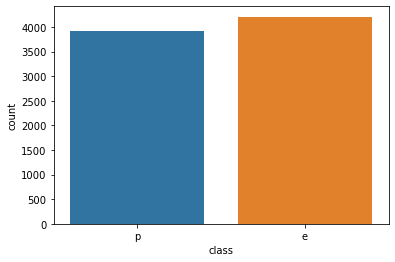

In [9]:
sns.countplot(data['class']) #class is a target variable

 from the above countplot we can see that we have nearly equal count of edible and poisonous classes in our data.hence we can say that our data is balanced.



Text(0.5, 1.0, 'Mushroom Cap-Surface w.r.t Class')

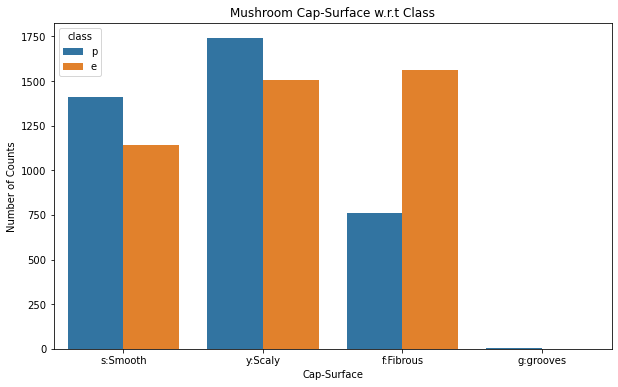

In [10]:
# visualization of cap-surface w.r.t class
plt.figure(figsize=(10,6))
cap_surface=sns.countplot(x='cap-surface',data=data,hue='class')
plt.xlabel('Cap-Surface')
plt.ylabel('Number of Counts')
cap_surface.set_xticklabels(['s:Smooth','y:Scaly','f:Fibrous','g:grooves'])
plt.title('Mushroom Cap-Surface w.r.t Class')

from the above graph ,we can say that there are 4 types of cap_surface in a mushroom and also it suggests that 'edible' mushroom do not have a 'cap-surface 'g:grooves' according to data.

Text(0.5, 1.0, 'Mushroom bruises w.r.t Class')

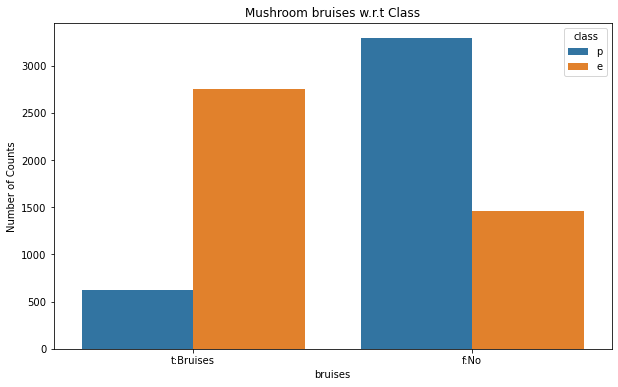

In [11]:
plt.figure(figsize=(10,6))
cap_surface=sns.countplot(x='bruises',data=data,hue='class')
plt.xlabel('bruises')
plt.ylabel('Number of Counts')
cap_surface.set_xticklabels(['t:Bruises','f:No'])
plt.title('Mushroom bruises w.r.t Class')

from the above we can say that mushroom may or may not have bruises but still it could be poisonous or edible according to our data

<Figure size 1008x432 with 0 Axes>

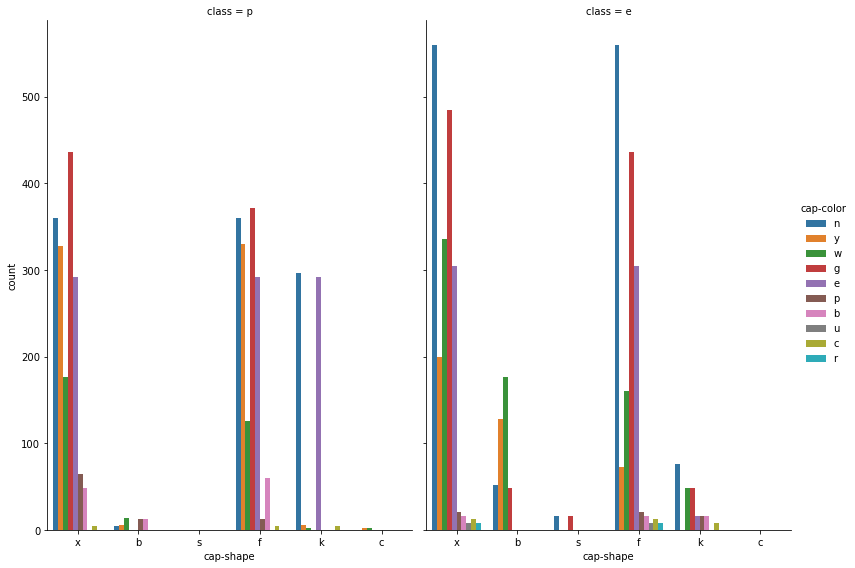

In [12]:
plt.figure(figsize=(14,6))
g=sns.catplot(x='cap-shape',hue='cap-color',col='class',data=data,kind='count',height=8,aspect=.7);

 1.white coloured and Bell shaped mushrooms are highly recommended for eating.
 2.Red coloured knobbed shaped mushroom are poisonous.


<Figure size 1008x432 with 0 Axes>

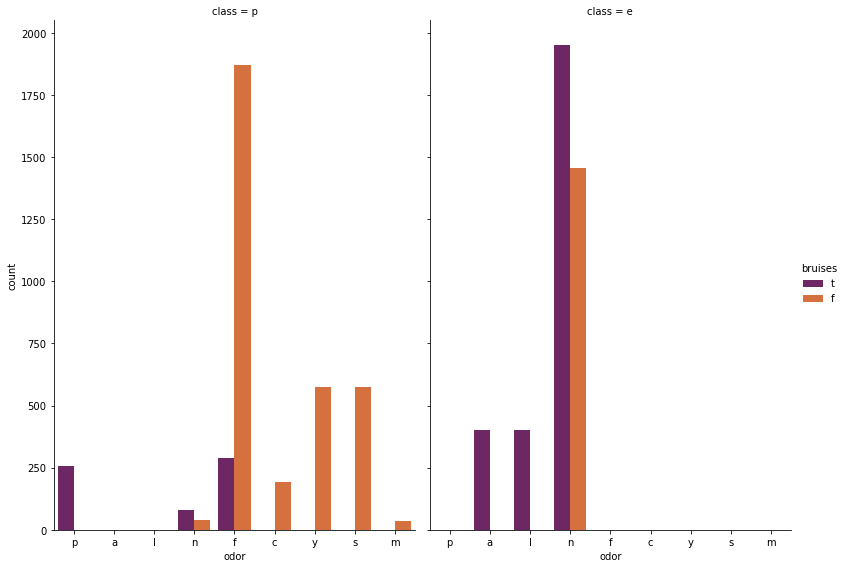

In [13]:
plt.figure(figsize=(14,6))
g=sns.catplot(x='odor',hue='bruises',col='class',data=data,kind='count',height=8,aspect=.7,palette='inferno');

 1.odourless and bruised mushrooms are highly recommended for eating.
 2.fishy odour with no bruises mushroom are poisonous.

### D-type conversion

In [14]:
data=data.astype('category')

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
for column in data.columns:
    data[column]=le.fit_transform(data[column])

In [17]:
data.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [18]:
x=data.drop(['class','veil-type'],axis=1)
y=data['class']

In [19]:
corr=data.corr()
corr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


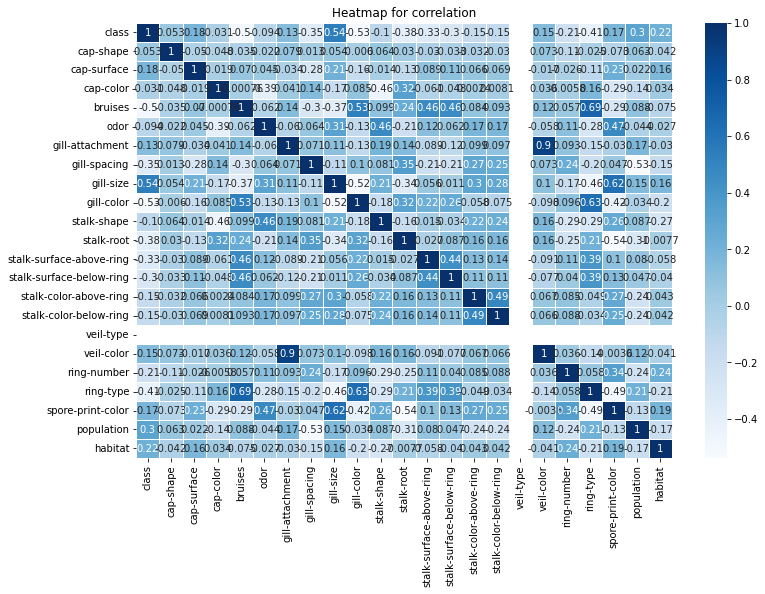

In [20]:
plt.figure(figsize=(12,8))
Heatmap=sns.heatmap(corr,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap for correlation")
plt.show()

### spliting of data

In [21]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6499, 21), (1625, 21), (6499,), (1625,))

In [23]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

### logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
lg_cf=confusion_matrix(y_pred,y_test)
lg_cf

array([[798,  41],
       [ 45, 741]], dtype=int64)

In [29]:
lg_ac=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_ac

94.7076923076923

In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       839
           1       0.95      0.94      0.95       786

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [31]:
lg_pr=precision_score(y_pred,y_test)
lg_pr

0.9475703324808185

In [32]:
lg_re=recall_score(y_pred,y_test)
lg_re

0.9427480916030534

In [33]:
lg_f1=f1_score(y_pred,y_test)
lg_f1

0.9451530612244898

### Decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred1=dt.predict(x_test)
y_pred1

array([0, 1, 1, ..., 1, 1, 1])

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
dt_cf=confusion_matrix(y_pred1,y_test)
dt_cf

array([[843,   0],
       [  0, 782]], dtype=int64)

In [39]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

100.0

In [40]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [41]:
dt_pr=precision_score(y_pred1,y_test)
dt_pr

1.0

In [42]:
dt_re=recall_score(y_pred1,y_test)
dt_re

1.0

In [43]:
dt_f1=f1_score(y_pred1,y_test)
dt_f1

1.0

### Random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rm=RandomForestClassifier()
rm.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred2=rm.predict(x_test)
y_pred2

array([0, 1, 1, ..., 1, 1, 1])

In [47]:
rf_cf=confusion_matrix(y_pred2,y_test)
rf_cf

array([[843,   0],
       [  0, 782]], dtype=int64)

In [48]:
rf_ac=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_ac

100.0

In [49]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [50]:
rf_pr=precision_score(y_pred2,y_test)
rf_pr

1.0

In [51]:
rf_re=recall_score(y_pred2,y_test)
rf_re

1.0

In [52]:
rf_f1=f1_score(y_pred2,y_test)
rf_f1

1.0

### KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred3=knn.predict(x_test)
y_pred3

array([0, 1, 1, ..., 1, 1, 1])

In [56]:
knn_cf=confusion_matrix(y_pred3,y_test)
knn_cf

array([[837,   0],
       [  6, 782]], dtype=int64)

In [57]:
knn_ac=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_ac

99.63076923076923

In [58]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       837
           1       1.00      0.99      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [59]:
knn_pr=precision_score(y_pred3,y_test)
knn_pr

1.0

In [60]:
knn_re=recall_score(y_pred3,y_test)
knn_re

0.9923857868020305

In [61]:
knn_f1=f1_score(y_pred3,y_test)
knn_f1

0.9961783439490446

### SVM

In [62]:
from sklearn.svm import SVC

In [63]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [64]:
y_pred4=svc.predict(x_test)
y_pred4

array([0, 1, 1, ..., 1, 1, 1])

In [65]:
svc_cf=confusion_matrix(y_pred4,y_test)
svc_cf

array([[842,   9],
       [  1, 773]], dtype=int64)

In [66]:
svc_ac=svc_cf.diagonal().sum()/svc_cf.sum()*100
svc_ac

99.38461538461539

In [67]:
print(classification_report(y_pred4,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       851
           1       0.99      1.00      0.99       774

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [68]:
svc_pr=precision_score(y_pred4,y_test)
svc_pr

0.9884910485933504

In [69]:
svc_re=recall_score(y_pred4,y_test)
svc_re

0.9987080103359173

In [70]:
svc_f1=f1_score(y_pred4,y_test)
svc_f1

0.993573264781491

### Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [73]:
y_pred5=gb.predict(x_test)
y_pred5

array([0, 1, 1, ..., 1, 1, 1])

In [74]:
gb_cf=confusion_matrix(y_pred5,y_test)
gb_cf

array([[843,   0],
       [  0, 782]], dtype=int64)

In [75]:
gb_ac=gb_cf.diagonal().sum()/gb_cf.sum()*100
gb_ac

100.0

In [76]:
print(classification_report(y_pred5,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [77]:
gb_pr=precision_score(y_pred5,y_test)
gb_pr

1.0

In [78]:
gb_re=recall_score(y_pred5,y_test)
gb_re

1.0

In [79]:
gb_f1=f1_score(y_pred5,y_test)
gb_f1

1.0

In [80]:
list1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","SVM","GRADIENT BOOSTING"]
list2=[lg_ac,dt_ac,rf_ac,knn_ac,svc_ac,gb_ac]
list3=[lg_pr,dt_pr,rf_pr,knn_pr,svc_pr,gb_pr]
list4=[lg_re,dt_re,rf_re,knn_re,svc_re,gb_re]
list5=[lg_f1,dt_f1,rf_f1,knn_f1,svc_f1,gb_f1]

In [81]:
df1=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1_score":list5})
df1

,Model Name,Accuracy,Precision,Recall,F1_score
0,LOGISTIC REGRESSION,94.707692,0.947570,0.942748,0.945153
1,DECISION TREE,100.000000,1.000000,1.000000,1.000000
2,RANDOM FOREST,100.000000,1.000000,1.000000,1.000000
3,KNN,99.630769,1.000000,0.992386,0.996178
4,SVM,99.384615,0.988491,0.998708,0.993573
5,GRADIENT BOOSTING,100.000000,1.000000,1.000000,1.000000


### applying PCA

In [82]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=7)
pca_fit=pca1.fit_transform(x)

In [83]:
pca1.explained_variance_ratio_

array([0.33758733, 0.16581098, 0.12285821, 0.06796611, 0.05831173,
       0.05092539, 0.04670841])

In [84]:
sum(pca1.explained_variance_ratio_)

0.8501681635086218

### spliting of data

In [85]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(pca_fit,y,test_size=0.2,random_state=42)

In [86]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6499, 7), (1625, 7), (6499,), (1625,))

### logistic regression

In [87]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [91]:
lg_cf=confusion_matrix(y_pred,y_test)
lg_cf

array([[737, 163],
       [106, 619]], dtype=int64)

In [92]:
lg_ac=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_ac

83.44615384615385

In [93]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       900
           1       0.79      0.85      0.82       725

    accuracy                           0.83      1625
   macro avg       0.83      0.84      0.83      1625
weighted avg       0.84      0.83      0.83      1625



In [94]:
lg_pr=precision_score(y_pred,y_test)
lg_pr

0.7915601023017903

In [95]:
lg_re=recall_score(y_pred,y_test)
lg_re

0.8537931034482759

In [96]:
lg_f1=f1_score(y_pred,y_test)
lg_f1

0.8214996682149968

### Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [99]:
y_pred1=dt.predict(x_test)
y_pred1

array([0, 1, 1, ..., 1, 1, 1])

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [101]:
dt_cf=confusion_matrix(y_pred1,y_test)
dt_cf

array([[823,  17],
       [ 20, 765]], dtype=int64)

In [102]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

97.72307692307692

In [103]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       840
           1       0.98      0.97      0.98       785

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [104]:
dt_pr=precision_score(y_pred1,y_test)
dt_pr

0.9782608695652174

In [105]:
dt_re=recall_score(y_pred1,y_test)
dt_re

0.9745222929936306

In [106]:
dt_f1=f1_score(y_pred1,y_test)
dt_f1

0.9763880025526485

### Random forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rm=RandomForestClassifier()
rm.fit(x_train,y_train)

RandomForestClassifier()

In [109]:
y_pred2=rm.predict(x_test)
y_pred2

array([0, 1, 1, ..., 1, 1, 1])

In [110]:
rf_cf=confusion_matrix(y_pred2,y_test)
rf_cf

array([[838,   1],
       [  5, 781]], dtype=int64)

In [111]:
rf_ac=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_ac

99.63076923076923

In [112]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       839
           1       1.00      0.99      1.00       786

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [113]:
rf_pr=precision_score(y_pred2,y_test)
rf_pr

0.9987212276214834

In [114]:
rf_re=recall_score(y_pred2,y_test)
rf_re

0.9936386768447837

In [115]:
rf_f1=f1_score(y_pred2,y_test)
rf_f1

0.996173469387755

### KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [118]:
y_pred3=knn.predict(x_test)
y_pred3

array([0, 1, 1, ..., 1, 1, 1])

In [119]:
knn_cf=confusion_matrix(y_pred3,y_test)
knn_cf

array([[823,   7],
       [ 20, 775]], dtype=int64)

In [120]:
knn_ac=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_ac

98.33846153846154

In [121]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       830
           1       0.99      0.97      0.98       795

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [122]:
knn_pr=precision_score(y_pred3,y_test)
knn_pr

0.9910485933503836

In [123]:
knn_re=recall_score(y_pred3,y_test)
knn_re

0.9748427672955975

In [124]:
knn_f1=f1_score(y_pred3,y_test)
knn_f1

0.9828788839568802

### SVM

In [125]:
from sklearn.svm import SVC

In [126]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [127]:
y_pred4=svc.predict(x_test)
y_pred4

array([0, 1, 1, ..., 1, 1, 1])

In [128]:
svc_cf=confusion_matrix(y_pred4,y_test)
svc_cf

array([[820,  55],
       [ 23, 727]], dtype=int64)

In [129]:
svc_ac=svc_cf.diagonal().sum()/svc_cf.sum()*100
svc_ac

95.19999999999999

In [130]:
print(classification_report(y_pred4,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       875
           1       0.93      0.97      0.95       750

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [131]:
svc_pr=precision_score(y_pred4,y_test)
svc_pr

0.9296675191815856

In [132]:
svc_re=recall_score(y_pred4,y_test)
svc_re

0.9693333333333334

In [133]:
svc_f1=f1_score(y_pred4,y_test)
svc_f1

0.9490861618798956

### Gradient Boosting

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [136]:
y_pred5=gb.predict(x_test)
y_pred5

array([0, 1, 1, ..., 1, 1, 1])

In [137]:
gb_cf=confusion_matrix(y_pred5,y_test)
gb_cf

array([[809,  66],
       [ 34, 716]], dtype=int64)

In [138]:
gb_ac=gb_cf.diagonal().sum()/gb_cf.sum()*100
gb_ac

93.84615384615384

In [139]:
print(classification_report(y_pred5,y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       875
           1       0.92      0.95      0.93       750

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



In [140]:
gb_pr=precision_score(y_pred5,y_test)
gb_pr

0.9156010230179028

In [141]:
gb_re=recall_score(y_pred5,y_test)
gb_re

0.9546666666666667

In [142]:
gb_f1=f1_score(y_pred5,y_test)
gb_f1

0.9347258485639687

In [143]:
list1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","SVM","GRADIENT BOOSTING"]
list2=[lg_ac,dt_ac,rf_ac,knn_ac,svc_ac,gb_ac]
list3=[lg_pr,dt_pr,rf_pr,knn_pr,svc_pr,gb_pr]
list4=[lg_re,dt_re,rf_re,knn_re,svc_re,gb_re]
list5=[lg_f1,dt_f1,rf_f1,knn_f1,svc_f1,gb_f1]

In [144]:
df2=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1_score":list5})
df2

,Model Name,Accuracy,Precision,Recall,F1_score
0,LOGISTIC REGRESSION,83.446154,0.791560,0.853793,0.821500
1,DECISION TREE,97.723077,0.978261,0.974522,0.976388
2,RANDOM FOREST,99.630769,0.998721,0.993639,0.996173
3,KNN,98.338462,0.991049,0.974843,0.982879
4,SVM,95.200000,0.929668,0.969333,0.949086
5,GRADIENT BOOSTING,93.846154,0.915601,0.954667,0.934726


here logistic regression is giving the accuracy 83.44%  and all other models are overfitted for this dataset.hence the logistic regression is the best classification algorithm for thhis dataset.